## Feature Engineering - Dates

- project_phase_actual_start_date
- project_phase_planned_end_date
- project_phase_actual_end_date

### Stuff to do:

- Group by month.
- Finding `Expected End - Start`. Finding the project length. 
- Finding `Expented End - Start` compared to the project cost.
- Finding `Expended Project End Date - Actual Project End Date`. To see if actual project end date is after the estimated end date. Percentage of planned duration.

### What to do with this data

- Graph it
- Calculate the correlation

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

In [129]:
# We will get the non-date values, marking them as NaT

# Keep a copy of the original column 
df['original_project_phase_planned_end_date'] = df['project_phase_planned_end_date']

# Convert the 'project_phase_planned_end_date' to datetime, make all errors as NaT (Not a Time)
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')

# Extract the original non-date values
non_date_values = df[df['project_phase_planned_end_date'].isna()]['original_project_phase_planned_end_date']

# Display the unique non-date values
unique_non_date_values = non_date_values.unique()
print(unique_non_date_values)



['PNS' 'F&E' 'DOES' 'IEH' 'DOEL' 'DOER' 'FTK' 'EMER' 'DOEP' '/  /']


We see that there are a number of non-date values in the date column. 

These values are:
- PNS
- F&E
- DOES
- IEH
- DOEL
- DOER
- FTK
- EMER
- DOEP

### Calculate: (Arithmetic) Difference between Start and Planned End Date (Theoretical Project Length)

In [130]:
# Import the dateframe again as we might have screwed it up earlier
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Convert the 'project_phase_planned_end_date' and 'project_phase_actual_start_date' to datetime
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')

# Calculate the difference and create the new column 'Expected End - Start'
df['Expected End - Start'] = df['project_phase_planned_end_date'] - df['project_phase_actual_start_date']

# Remove the NaN entries
df = df.dropna(subset=['Expected End - Start'])

# Display the DataFrame with the new column
df.head()


,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,Expected End - Start
0,0,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,Construction,In-Progress,2016-07-07,2018-03-28,NaN,4050000,4229193.0,3791127.0,"DSF: 0000821031, 0000822210",False,629 days
1,1,10,X254,I.S. 254 - BRONX,SCA CIP,FACADE/ROOFS,"CM, F&E",In-Progress,2016-07-07,2018-03-28,NaN,252000,489326.0,485620.0,"DSF: 0000821031, 0000822210",False,629 days
2,2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,2017-07-27,2017-11-27,08/03/2017,0,1792.0,1792.0,DSF: 0000823560,False,123 days
3,3,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Design,In-Progress,2017-08-04,2018-02-05,NaN,19110,17318.0,7169.0,DSF: 0000823560,True,185 days
6,6,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,2018-01-15,09/14/2017,50000,49625.0,49625.0,DSF: 0000844624,False,245 days


### Calculate: (Arithmetic) Difference between Start and Actual End Date (Actual Project Length)

In [131]:
# Import the dateframe again as we might have screwed it up earlier
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Convert the 'project_phase_actual_end_date' and 'project_phase_actual_start_date' to datetime
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')

# Calculate the difference and create the new column 'Expected End - Start'
df['Actual End - Start'] = df['project_phase_actual_end_date'] - df['project_phase_actual_start_date']

# Remove the NaN entries
df = df.dropna(subset=['Actual End - Start'])

# Display the DataFrame with the new column
df.head()


,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,Actual End - Start
2,2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,2017-07-27,11/27/2017,2017-08-03,0,1792.0,1792.0,DSF: 0000823560,False,7 days
6,6,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,01/15/2018,2017-09-14,50000,49625.0,49625.0,DSF: 0000844624,False,122 days
7,7,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,01/15/2018,2017-09-14,76250,75677.0,75677.0,DSF: 0000845571,False,122 days
8,8,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Scope,Complete,2016-08-02,12/19/2016,2017-02-13,36881,57074.0,56288.0,"DSF: 0000820035, 0000866151",False,195 days
9,9,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Design,Complete,2017-05-15,10/16/2017,2017-12-18,141246,183396.0,180358.0,"DSF: 0000820035, 0000866151",False,217 days


### Calculate: (Arithmetic) Difference between Expended Project End Date and Actual Project End Date (Time Late)

In [132]:
# Import the dateframe again as we might have screwed it up earlier
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Convert the 'project_phase_actual_end_date' and 'project_phase_planned_end_date' to datetime
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')

# Calculate the difference and create the new column 'Expected End - Start'
df['Actual End - Expected End'] =  df['project_phase_actual_end_date'] - df['project_phase_planned_end_date']

# Remove the NaN entries
df = df.dropna(subset=['Actual End - Expected End'])

# Display the DataFrame with the new column
df.head()


,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,Actual End - Expected End
2,2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,07/27/2017,2017-11-27,2017-08-03,0,1792.0,1792.0,DSF: 0000823560,False,-116 days
6,6,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,05/15/2017,2018-01-15,2017-09-14,50000,49625.0,49625.0,DSF: 0000844624,False,-123 days
7,7,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,05/15/2017,2018-01-15,2017-09-14,76250,75677.0,75677.0,DSF: 0000845571,False,-123 days
8,8,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Scope,Complete,08/02/2016,2016-12-19,2017-02-13,36881,57074.0,56288.0,"DSF: 0000820035, 0000866151",False,56 days
9,9,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Design,Complete,05/15/2017,2017-10-16,2017-12-18,141246,183396.0,180358.0,"DSF: 0000820035, 0000866151",False,63 days


### Calculate: (Percentage) Difference between Actual Project Length and Expected Project Length -> (Actual End - Start) / (Expected End - Start)

In [133]:
# Import the dateframe again as we might have screwed it up earlier
df = pd.read_csv('https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv')

# Convert the 'project_phase_actual_end_date' and 'project_phase_planned_end_date' to datetime
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')

# Remove the NaN entries
df = df.dropna(subset=['project_phase_planned_end_date'])
df = df.dropna(subset=['project_phase_actual_end_date'])
df = df.dropna(subset=['project_phase_actual_start_date'])

# Calculate the percentage difference and create the new column 'Expected End / Start'
df['(Actual End - Start) / (Expected End - Start)'] =  (df['project_phase_actual_end_date'] - df['project_phase_actual_start_date']) / (df['project_phase_planned_end_date'] - df['project_phase_actual_start_date']) * 100


# Display the DataFrame with the new column
df.head()


,Unnamed: 0,project_geographic_district,project_building_identifier,project_school_name,project_type,project_description,project_phase_name,project_status_name,project_phase_actual_start_date,project_phase_planned_end_date,project_phase_actual_end_date,project_budget_amount,final_estimate_of_actual_costs_through_end_of_phase_amount,total_phase_actual_spending_amount,dsf_number_s,failure,(Actual End - Start) / (Expected End - Start)
2,2,10,X254,I.S. 254 - BRONX,SCA CIP RESOA,FY16 RESO A IP SURVEILLANCE CAMERA INSTALLATION,Scope,Complete,2017-07-27,2017-11-27,2017-08-03,0,1792.0,1792.0,DSF: 0000823560,False,5.691057
6,6,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,2018-01-15,2017-09-14,50000,49625.0,49625.0,DSF: 0000844624,False,49.795918
7,7,10,X254,I.S. 254 - BRONX,DIIT - RESOA,FY17 RESO A TECHNOLOGY,Purch & Install,Complete,2017-05-15,2018-01-15,2017-09-14,76250,75677.0,75677.0,DSF: 0000845571,False,49.795918
8,8,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Scope,Complete,2016-08-02,2016-12-19,2017-02-13,36881,57074.0,56288.0,"DSF: 0000820035, 0000866151",False,140.287770
9,9,10,X279,P.S. 279 - BRONX,SCA CIP,WATER PENETRATION/ROOFS,Design,Complete,2017-05-15,2017-10-16,2017-12-18,141246,183396.0,180358.0,"DSF: 0000820035, 0000866151",False,140.909091


### Hypothesis: Projects that take magnitudes longer than expected are more likely to be failures.

Analysis is on notion:

https://www.notion.so/pogchampion/IBM-Machine-Learning-9ab2e295c69849fe84c37bea416869fe?pvs=4#f28e02c2fbdf4e73ad7eb33b4fa173c5 

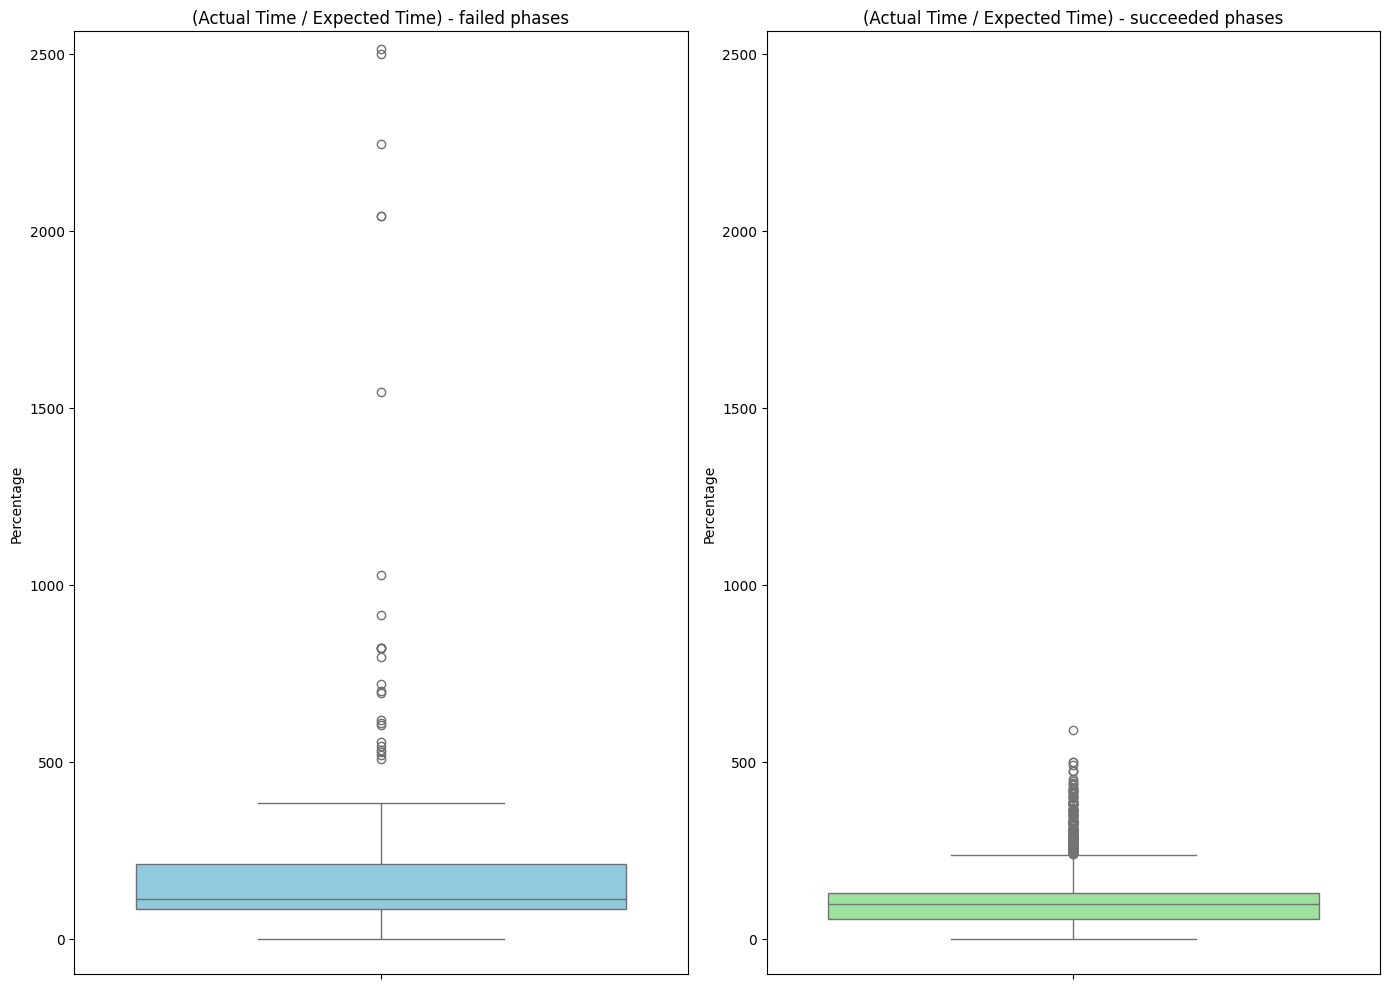

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset from the URL
url = 'https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv'
df = pd.read_csv(url)

# Convert the necessary columns to datetime
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')

# Remove the NaN entries
df = df.dropna(subset=['project_phase_actual_end_date', 'project_phase_actual_start_date', 'project_phase_planned_end_date'])

# Calculate the percentage difference and create the new column 'Expected End / Start'
df['time_percentage'] = ((df['project_phase_actual_end_date'] - df['project_phase_actual_start_date']) / 
                         (df['project_phase_planned_end_date'] - df['project_phase_actual_start_date'])) * 100

# Replace infinite values with NaN and then drop them
df['time_percentage'] = df['time_percentage'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['time_percentage'])

# Separate the data into failed and succeeded phases
failed_phases = df[df['failure'] == True]
succeeded_phases = df[df['failure'] == False]

# Determine the common y-axis limits
y_min = min(failed_phases['time_percentage'].min(), succeeded_phases['time_percentage'].min())
y_max = max(failed_phases['time_percentage'].max(), succeeded_phases['time_percentage'].max()) + 50

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# RANGES ARE LIMITED FOR READABILITY

# Determine the common y-axis limits based on a reasonable range
y_min = -100
# y_max = 

# Box plot for 'time_percentage' of failed phases
sns.boxplot(y=failed_phases['time_percentage'], color='skyblue', ax=axes[0])
axes[0].set_title('(Actual Time / Expected Time) - failed phases')
axes[0].set_ylabel('Percentage')
axes[0].set_ylim(y_min, y_max)

# Box plot for 'time_percentage' of succeeded phases
sns.boxplot(y=succeeded_phases['time_percentage'], color='lightgreen', ax=axes[1])
axes[1].set_title('(Actual Time / Expected Time) - succeeded phases')
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(y_min, y_max)

# Display the plots
plt.tight_layout()
plt.show()


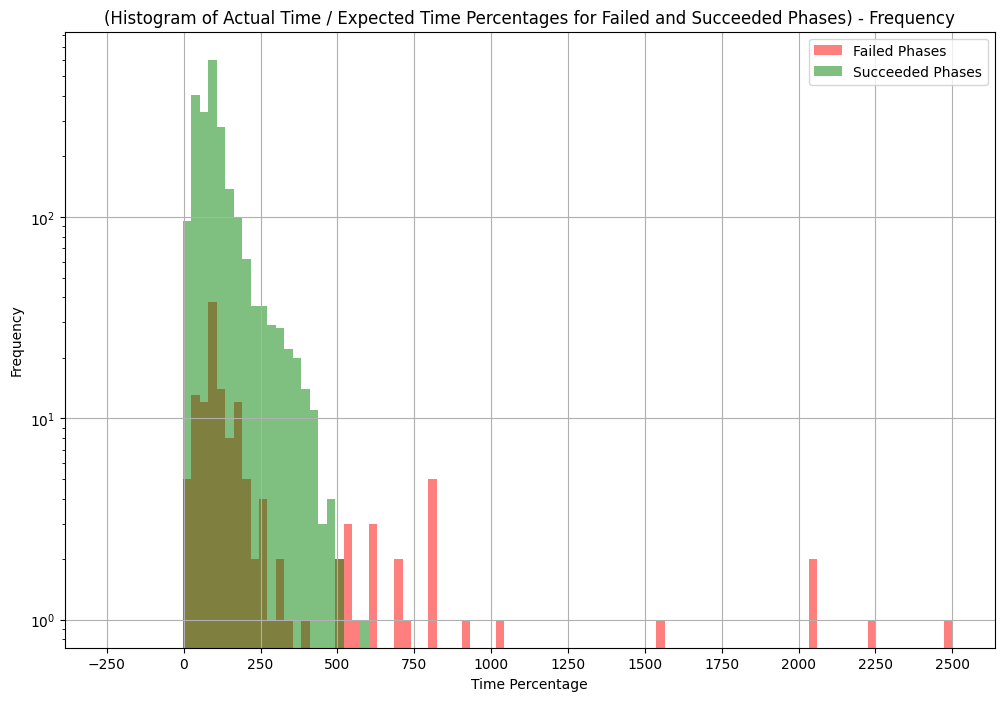

In [135]:
# Define the range for the time percentages to display
time_percentage_range = (-250, 2500)

# Create a histogram with both failures and successes on the same chart
plt.figure(figsize=(12, 8))
plt.hist(failed_phases['time_percentage'], bins=100, alpha=0.5, label='Failed Phases', color='red', range=time_percentage_range)
plt.hist(succeeded_phases['time_percentage'], bins=100, alpha=0.5, label='Succeeded Phases', color='green', range=time_percentage_range)
plt.xticks(np.arange(time_percentage_range[0], time_percentage_range[1] + 250, 250))
plt.xlabel('Time Percentage')
plt.ylabel('Frequency')
plt.title('(Histogram of Actual Time / Expected Time Percentages for Failed and Succeeded Phases) - Frequency')
plt.legend(loc='upper right')
plt.yscale('log')  # Use log scale for better visibility of the distribution
plt.grid(True)
plt.show()


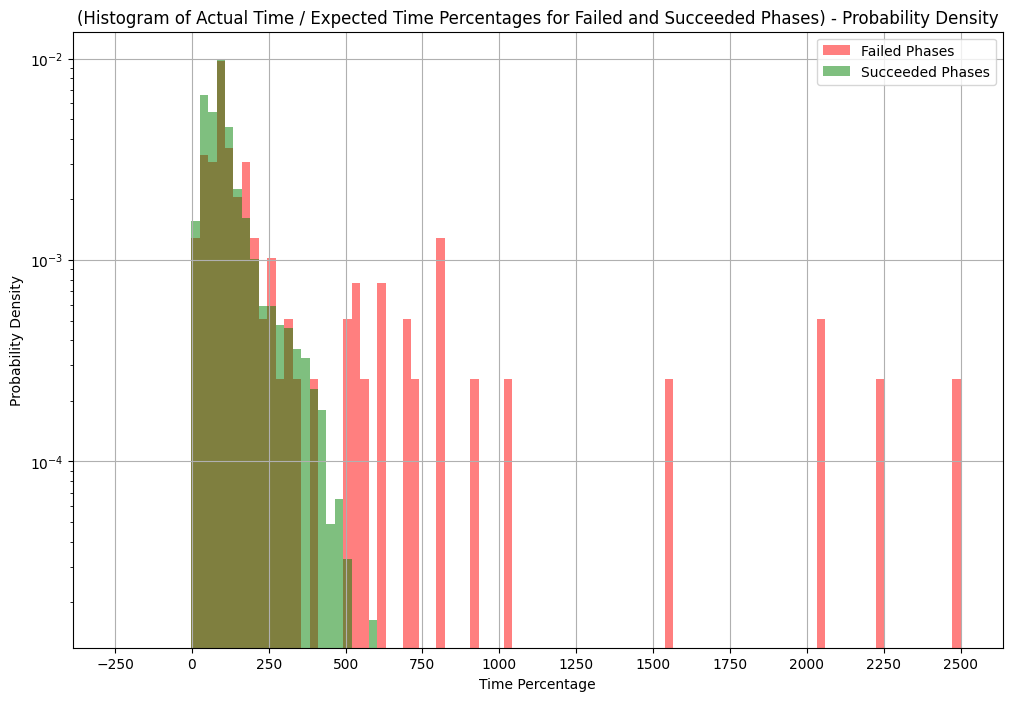

In [136]:
# Define the range for the time percentages to display
time_percentage_range = (-250, 2500)

# Create a histogram with both failures and successes on the same chart
plt.figure(figsize=(12, 8))
plt.hist(failed_phases['time_percentage'], bins=100, alpha=0.5, label='Failed Phases', color='red', range=time_percentage_range, density=True)
plt.hist(succeeded_phases['time_percentage'], bins=100, alpha=0.5, label='Succeeded Phases', color='green', range=time_percentage_range, density=True)
plt.xticks(np.arange(time_percentage_range[0], time_percentage_range[1] + 250, 250))
plt.xlabel('Time Percentage')
plt.ylabel('Probability Density')
plt.title('(Histogram of Actual Time / Expected Time Percentages for Failed and Succeeded Phases) - Probability Density')
plt.legend(loc='upper right')
plt.yscale('log')  # Use log scale for better visibility of the distribution
plt.grid(True)
plt.show()

### Hypothesis: Projects that have long expected times are more likely to be failures. 



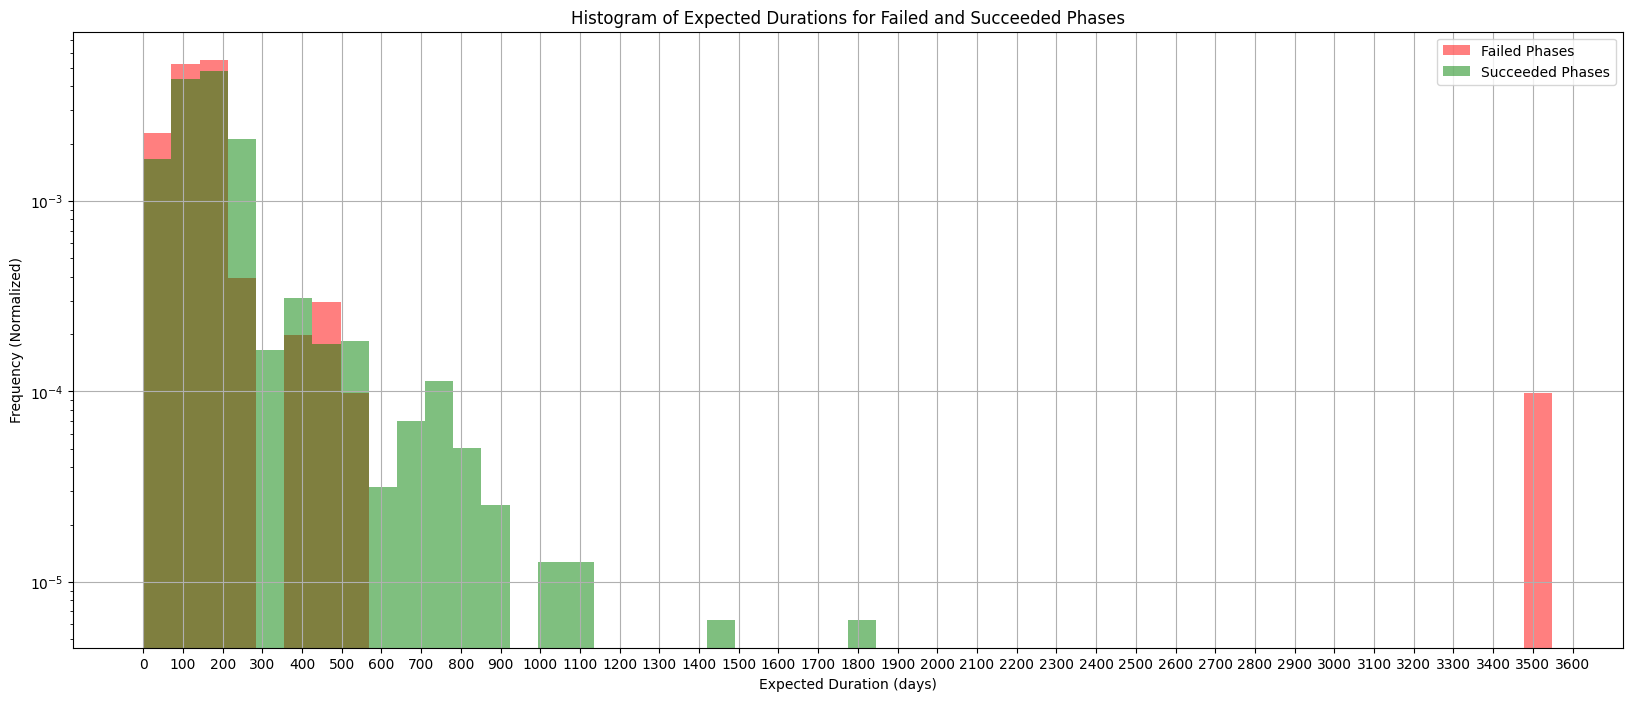

Summary Statistics for Failed Phases:
count     144.000000
mean      165.965278
std       295.889448
min        -6.000000
25%       103.000000
50%       141.000000
75%       165.000000
max      3549.000000
Name: expected_duration, dtype: float64

Summary Statistics for Succeeded Phases:
count    2224.000000
mean      178.699640
std       133.545555
min         1.000000
25%       122.000000
50%       153.000000
75%       209.000000
max      1841.000000
Name: expected_duration, dtype: float64

Threshold for Long Duration: 177.93 days

Number and Proportion of Long Expected Durations (> Threshold):
Failed Phases: 29 (20.14%)
Succeeded Phases: 727 (32.69%)

Statistical Test (t-test) Results:
t-statistic: -0.513078294078183
p-value: 0.6086678314649463


In [137]:
# Calculate the expected time (duration)
df['expected_duration'] = (df['project_phase_planned_end_date'] - df['project_phase_actual_start_date']).dt.days

# Remove NaN and infinite values
df['expected_duration'] = df['expected_duration'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['expected_duration'])

# Separate the data into failed and succeeded phases
failed_phases = df[df['failure'] == True]
succeeded_phases = df[df['failure'] == False]

# Define the range for the expected durations to display
expected_duration_range = (0, df['expected_duration'].max())

# Create a histogram with both failures and successes on the same chart
plt.figure(figsize=(20, 8))

# Histogram for failed phases
plt.hist(failed_phases['expected_duration'], bins=50, alpha=0.5, label='Failed Phases', color='red', range=expected_duration_range, density=True)
plt.hist(succeeded_phases['expected_duration'], bins=50, alpha=0.5, label='Succeeded Phases', color='green', range=expected_duration_range, density=True)

# Add more x-axis ticks
plt.xticks(np.arange(0, expected_duration_range[1] + 100, 100))

plt.xlabel('Expected Duration (days)')
plt.ylabel('Frequency (Normalized)')
plt.title('Histogram of Expected Durations for Failed and Succeeded Phases')
plt.legend(loc='upper right')
plt.yscale('log')  # Use log scale for better visibility of the distribution
plt.grid(True)
plt.show()

# Calculate summary statistics
failed_stats = failed_phases['expected_duration'].describe()
succeeded_stats = succeeded_phases['expected_duration'].describe()

# Calculate the number and proportion of long expected durations (> mean of all expected durations) in both categories
long_duration_threshold = df['expected_duration'].mean()
failed_long_durations = failed_phases[failed_phases['expected_duration'] > long_duration_threshold].shape[0]
succeeded_long_durations = succeeded_phases[succeeded_phases['expected_duration'] > long_duration_threshold].shape[0]

failed_proportion_long = failed_long_durations / failed_phases.shape[0]
succeeded_proportion_long = succeeded_long_durations / succeeded_phases.shape[0]

# Perform a statistical test
t_stat, p_value = stats.ttest_ind(failed_phases['expected_duration'], succeeded_phases['expected_duration'], equal_var=False)

# Print results
print("Summary Statistics for Failed Phases:")
print(failed_stats)
print("\nSummary Statistics for Succeeded Phases:")
print(succeeded_stats)

print(f"\nThreshold for Long Duration: {long_duration_threshold:.2f} days")
print("\nNumber and Proportion of Long Expected Durations (> Threshold):")
print(f"Failed Phases: {failed_long_durations} ({failed_proportion_long:.2%})")
print(f"Succeeded Phases: {succeeded_long_durations} ({succeeded_proportion_long:.2%})")

print("\nStatistical Test (t-test) Results:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


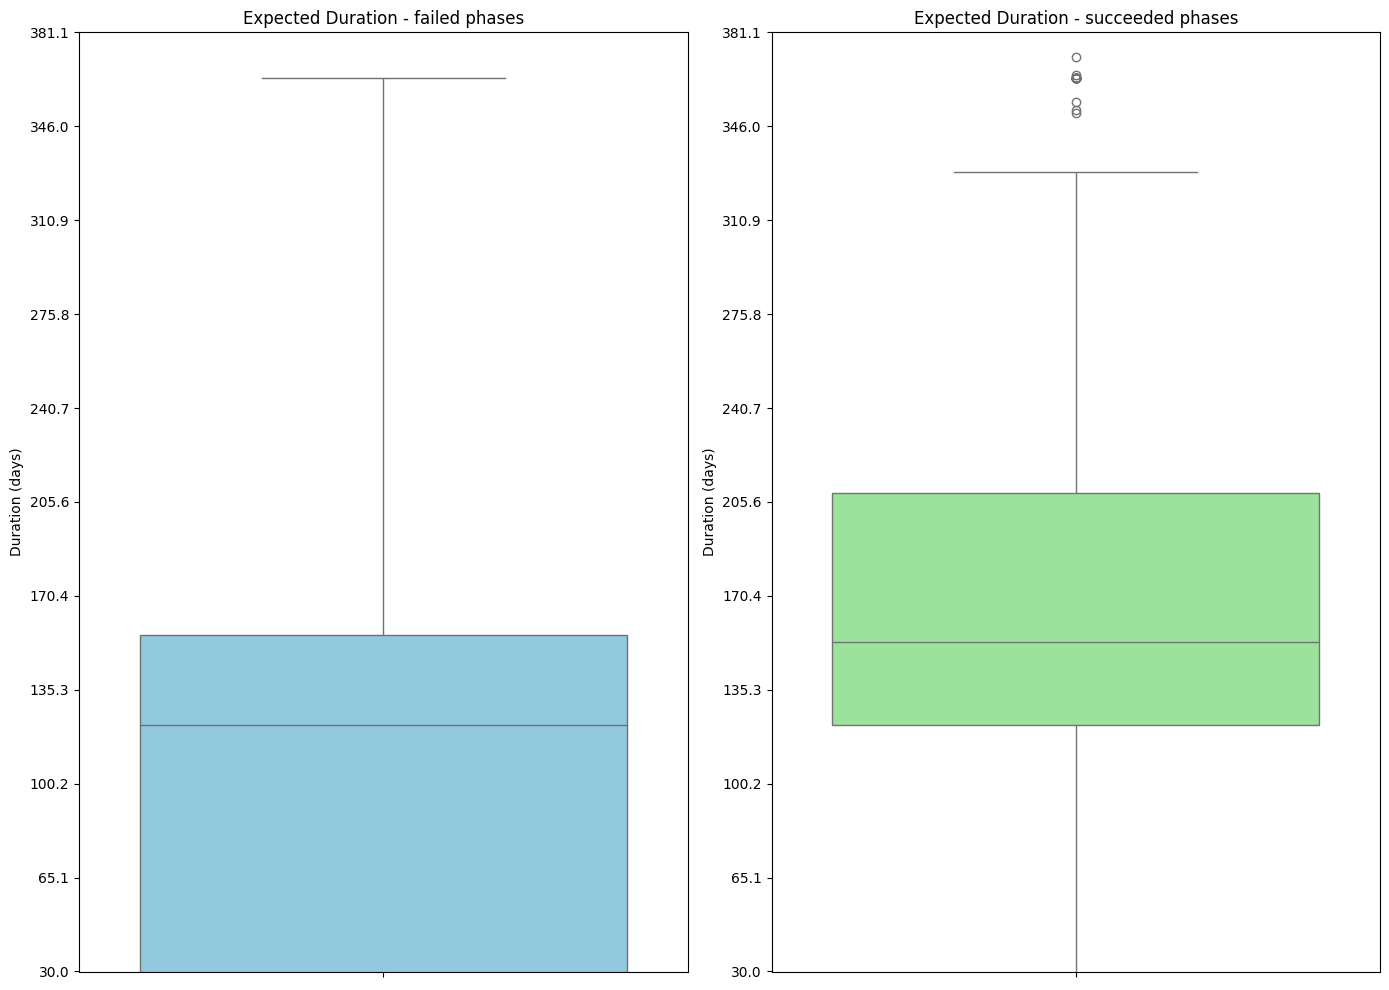

Summary Statistics for Failed Phases:
count     198.000000
mean      120.702020
std       262.760409
min        -6.000000
25%         0.000000
50%       122.000000
75%       155.750000
max      3549.000000
Name: expected_duration, dtype: float64

Summary Statistics for Succeeded Phases:
count    2230.000000
mean      178.218834
std       133.686708
min         0.000000
25%       122.000000
50%       153.000000
75%       209.000000
max      1841.000000
Name: expected_duration, dtype: float64

Threshold for Long Duration: 173.53 days

Number and Proportion of Long Expected Durations (> Threshold):
Failed Phases: 31 (15.66%)
Succeeded Phases: 740 (33.18%)

Statistical Test (t-test) Results:
t-statistic: -3.045321602250863
p-value: 0.0026276105801721307


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset from the URL
url = 'https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv'
df = pd.read_csv(url)

# Convert the necessary columns to datetime
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')
df['project_phase_planned_end_date'] = pd.to_datetime(df['project_phase_planned_end_date'], errors='coerce')

# Remove the NaN entries
df = df.dropna(subset=['project_phase_actual_end_date', 'project_phase_actual_start_date', 'project_phase_planned_end_date'])

# Calculate the expected time (duration)
df['expected_duration'] = (df['project_phase_planned_end_date'] - df['project_phase_actual_start_date']).dt.days

# Remove NaN and infinite values
df['expected_duration'] = df['expected_duration'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['expected_duration'])

# Separate the data into failed and succeeded phases
failed_phases = df[df['failure'] == True]
succeeded_phases = df[df['failure'] == False]

# Determine the y-axis limits based on the 5th and 95th percentiles to remove extreme outliers
y_min = df['expected_duration'].quantile(0.05)
y_max = df['expected_duration'].quantile(0.95)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# Box plot for 'expected_duration' of failed phases
sns.boxplot(y=failed_phases['expected_duration'], color='skyblue', ax=axes[0])
axes[0].set_title('Expected Duration - failed phases')
axes[0].set_ylabel('Duration (days)')
axes[0].set_ylim(y_min, y_max)
axes[0].set_yticks(np.arange(y_min, y_max + 1, (y_max - y_min) / 10))

# Box plot for 'expected_duration' of succeeded phases
sns.boxplot(y=succeeded_phases['expected_duration'], color='lightgreen', ax=axes[1])
axes[1].set_title('Expected Duration - succeeded phases')
axes[1].set_ylabel('Duration (days)')
axes[1].set_ylim(y_min, y_max)
axes[1].set_yticks(np.arange(y_min, y_max + 1, (y_max - y_min) / 10))

# Display the plots
plt.tight_layout()
plt.show()

# Calculate summary statistics
failed_stats = failed_phases['expected_duration'].describe()
succeeded_stats = succeeded_phases['expected_duration'].describe()

# Calculate the number and proportion of long expected durations (> mean of all expected durations) in both categories
long_duration_threshold = df['expected_duration'].mean()
failed_long_durations = failed_phases[failed_phases['expected_duration'] > long_duration_threshold].shape[0]
succeeded_long_durations = succeeded_phases[succeeded_phases['expected_duration'] > long_duration_threshold].shape[0]

failed_proportion_long = failed_long_durations / failed_phases.shape[0]
succeeded_proportion_long = succeeded_long_durations / succeeded_phases.shape[0]

# Perform a statistical test
t_stat, p_value = stats.ttest_ind(failed_phases['expected_duration'], succeeded_phases['expected_duration'], equal_var=False)

# Print results
print("Summary Statistics for Failed Phases:")
print(failed_stats)
print("\nSummary Statistics for Succeeded Phases:")
print(succeeded_stats)

print(f"\nThreshold for Long Duration: {long_duration_threshold:.2f} days")
print("\nNumber and Proportion of Long Expected Durations (> Threshold):")
print(f"Failed Phases: {failed_long_durations} ({failed_proportion_long:.2%})")
print(f"Succeeded Phases: {succeeded_long_durations} ({succeeded_proportion_long:.2%})")

print("\nStatistical Test (t-test) Results:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


### Hypothesis: Projects that have long expected times in certain areas are more likely to be failures. 

/tmp/ipykernel_877/1491561144.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failure_rate_per_month.index, y=failure_rate_per_month.values, palette='viridis')


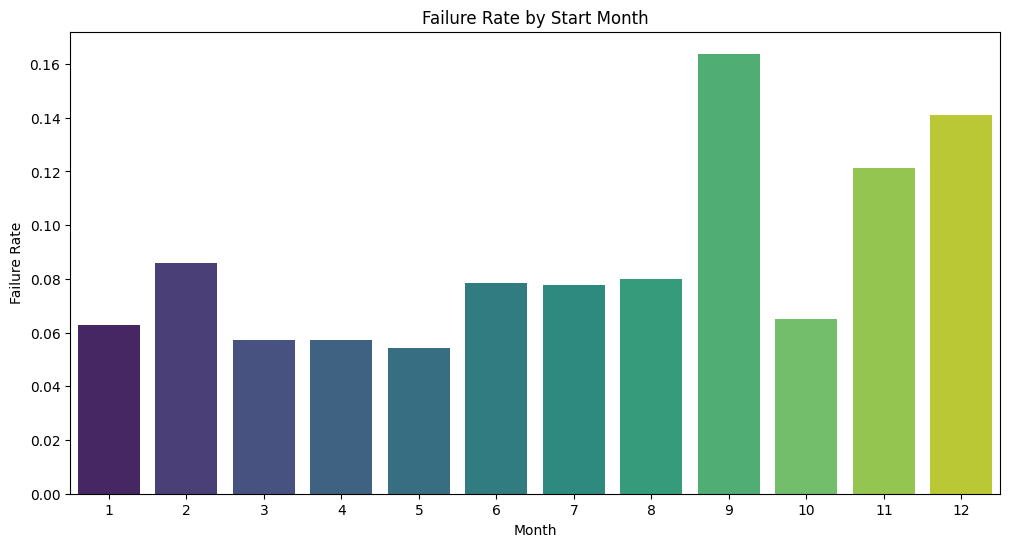

ANOVA Test Results for Failure Rates by Month: F-statistic = 3.0288922069576834, p-value = 0.0004971890466375838


In [139]:
# Extract the month and quarter from the project start date
df['start_month'] = df['project_phase_actual_start_date'].dt.month

# Separate the data into failed and succeeded phases
failed_phases = df[df['failure'] == True]
succeeded_phases = df[df['failure'] == False]

# Calculate the failure rates per month
failure_rate_per_month = df.groupby('start_month')['failure'].mean()

# Create a bar plot for failure rates by month
plt.figure(figsize=(12, 6))
sns.barplot(x=failure_rate_per_month.index, y=failure_rate_per_month.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Failure Rate')
plt.title('Failure Rate by Start Month')
plt.show()

# Perform a statistical test to compare failure rates between different months
months = df['start_month'].unique()
failure_rates = [df[df['start_month'] == month]['failure'].mean() for month in months]
f_stat, p_value = stats.f_oneway(*[df[df['start_month'] == month]['failure'] for month in months])

print(f"ANOVA Test Results for Failure Rates by Month: F-statistic = {f_stat}, p-value = {p_value}")

/tmp/ipykernel_877/135831253.py:33: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='failure', index='start_month', columns='length_category', aggfunc='mean')


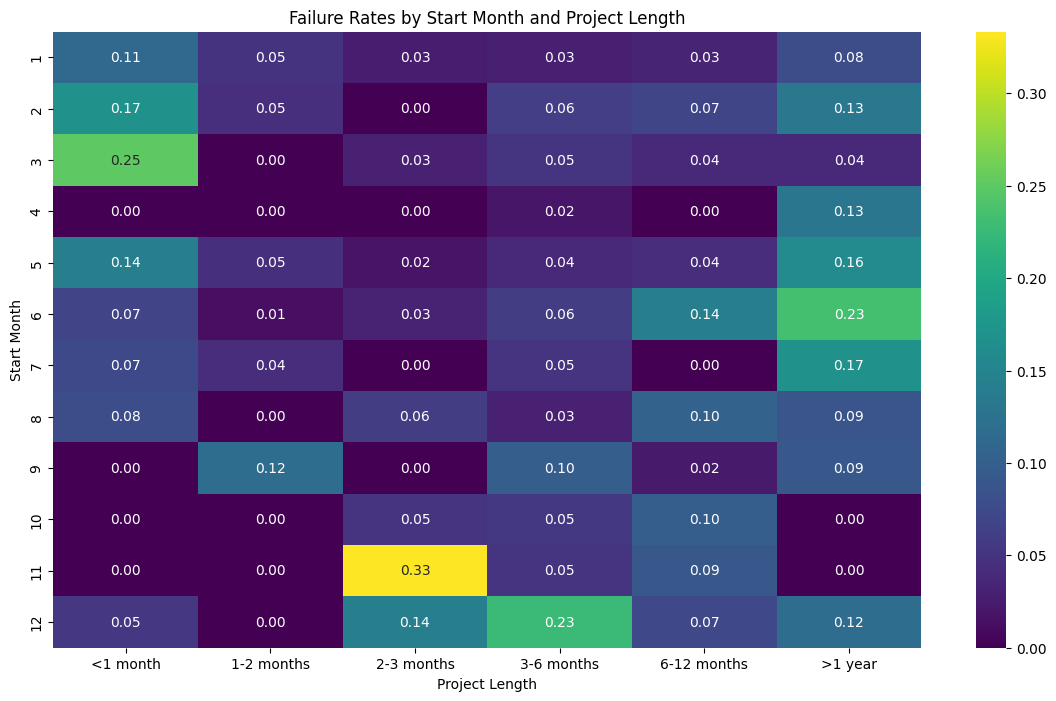

Two-Way ANOVA Test Results:
                                       sum_sq      df         F    PR(>F)
C(start_month)                       1.340648    11.0  2.451264  0.004792
C(length_category)                   1.324097     5.0  5.326203  0.000071
C(start_month):C(length_category)    4.388812    55.0  1.604916  0.003302
Residual                           141.354267  2843.0       NaN       NaN


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset from the URL
url = 'https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv'
df = pd.read_csv(url)

# Convert the necessary columns to datetime
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')

# Remove the NaN entries
df = df.dropna(subset=['project_phase_actual_start_date', 'project_phase_actual_end_date'])

# Extract the month from the project start date
df['start_month'] = df['project_phase_actual_start_date'].dt.month

# Calculate the project length (duration)
df['project_length'] = (df['project_phase_actual_end_date'] - df['project_phase_actual_start_date']).dt.days

# Remove NaN and infinite values
df['project_length'] = df['project_length'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['project_length'])

# Create bins for project length
length_bins = [0, 30, 60, 90, 180, 365, np.inf]
length_labels = ['<1 month', '1-2 months', '2-3 months', '3-6 months', '6-12 months', '>1 year']
df['length_category'] = pd.cut(df['project_length'], bins=length_bins, labels=length_labels)

# Create a pivot table to calculate failure rates by start month and project length
pivot_table = df.pivot_table(values='failure', index='start_month', columns='length_category', aggfunc='mean')

# Create a heatmap for failure rates by start month and project length
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.xlabel('Project Length')
plt.ylabel('Start Month')
plt.title('Failure Rates by Start Month and Project Length')
plt.show()

# Perform a two-way ANOVA test
# We need to flatten the data for ANOVA
df['failure'] = df['failure'].astype(int)
flattened_data = df[['start_month', 'length_category', 'failure']].dropna()

# Perform the two-way ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('failure ~ C(start_month) + C(length_category) + C(start_month):C(length_category)', data=flattened_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-Way ANOVA Test Results:")
print(anova_table)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset from the URL
url = 'https://datasocibmproject.s3.ap-southeast-2.amazonaws.com/structured_data/capital_project_schedules_and_budgets_1.csv'
df = pd.read_csv(url)

# Convert the necessary columns to datetime
df['project_phase_actual_start_date'] = pd.to_datetime(df['project_phase_actual_start_date'], errors='coerce')
df['project_phase_actual_end_date'] = pd.to_datetime(df['project_phase_actual_end_date'], errors='coerce')

# Remove the NaN entries
df = df.dropna(subset=['project_phase_actual_start_date', 'project_phase_actual_end_date'])

# Extract the month and year from the project start date
df['start_month'] = df['project_phase_actual_start_date'].dt.month
df['start_year'] = df['project_phase_actual_start_date'].dt.year

# Calculate the failure rates per month per year
failure_rate_per_month_year = df.groupby(['start_year', 'start_month'])['failure'].mean().reset_index()

# Create a bar plot for failure rates by month for each year
plt.figure(figsize=(16, 10))
sns.barplot(x='start_month', y='failure', hue='start_year', data=failure_rate_per_month_year, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Failure Rate')
plt.title('Failure Rate by Start Month for Each Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Perform a statistical test to compare failure rates between different months for each year
years = df['start_year'].unique()
results = {}
for year in years:
    months = df[df['start_year'] == year]['start_month'].unique()
    failure_rates = [df[(df['start_year'] == year) & (df['start_month'] == month)]['failure'].mean() for month in months]
    f_stat, p_value = stats.f_oneway(*[df[(df['start_year'] == year) & (df['start_month'] == month)]['failure'] for month in months])
    results[year] = {'f_stat': f_stat, 'p_value': p_value}

print("ANOVA Test Results for Failure Rates by Month for Each Year:")
for year, result in results.items():
    print(f"Year: {year}, F-statistic: {result['f_stat']}, p-value: {result['p_value']}")
